In [1]:
import numpy as np
import random
import math
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
class SlotArm():
    def __init__(self, prob):
        self.prob = prob # コインが出る確率

    def draw(self):
        if self.prob > random.random():
            return 1.0
        else:
            return 0.0

In [3]:
class EpsilonGreedy():
    """
    :pram epsilon: 探索する確率
    :pram n: 各アームの試行数
    :pram v: 各アームの価値
    """
    def __init__(self, epsilon):

        self.epsilon = epsilon

    def initialize(self, n_arms: list):
        self.n = np.zeros(n_arms)
        self.v = np.zeros(n_arms)

    def select_arm(self) -> int:
        """
        確率εでランダムにアームを選ぶ。
        1-εで価値が最も高いアームを選ぶ。
        """
        if self.epsilon > random.random():
            return np.random.randint(0, len(self.v))
        else:
            return np.argmax(self.v)

    def update(self, chosen_arm: int, reward, t):
        self.n[chosen_arm] += 1

        n = self.n[chosen_arm]
        v = self.v[chosen_arm]
        # アームの価値平均を更新
        self.v[chosen_arm] = ((n - 1) / float(n)) * v + (1 / float(n)) * reward

    def label(self):
        return "ε-greedy({})".format(self.epsilon)

In [4]:
class UCB1():
    """
    n: 各アームの試行回数
    w: 各アームの成功回数
    v: 各アームの価値
    """
    def initialize(self, n_arms):
        self.n = np.zeros(n_arms)
        self.w = np.zeros(n_arms)
        self.v = np.zeros(n_arms)

    def select_arm(self) -> int:
        for i in range(len(self.n)):
            if self.n[i] == 0:
                return i

        return np.argmax(self.v)

    def update(self, chosen_arm, reward, t):
        self.n[chosen_arm] += 1

        if reward == 1.0:
            self.w[chosen_arm] += 1

        for i in range(len(self.v)):
            if self.n[i] == 0: # 試行回数が０なら更新する必要はない
                continue
            self.v[i] = self.w[i] / self.n[i] + (2 * math.log(t) / self.n[i]) ** 0.5

    def label(self):
        return 'UCB1'

In [5]:
def play(algos, arms, num_sims, num_time):
    """
    :pram num_sims: 試行回数
    :pram num_time: スロットを回す回数
    :return times, rewards: 履歴
    """
    times = np.zeros(num_sims * num_time)
    rewards = np.zeros(num_sims * num_time)

    for sim in range(num_sims):
        algos.initialize(len(arms))

        for time in range(num_time):
            index = sim * num_time + time

            times[index] = time + 1
            chosen_arm = algos.select_arm()
            reward = arms[chosen_arm].draw()
            rewards[index] = reward

            algos.update(chosen_arm, reward, time + 1)

    return [times, rewards]

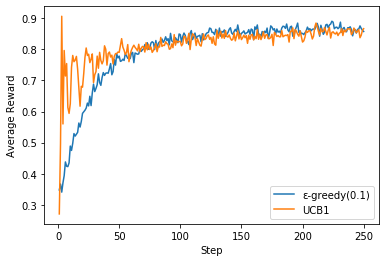

In [6]:
arms = (SlotArm(0.3), SlotArm(0.5), SlotArm(0.9))
algos = (EpsilonGreedy(0.1), UCB1())

for algos in algos:
    results = play(algos, arms, 1000, 250)

    df = pd.DataFrame({'times': results[0], 'rewards': results[1]})
    mean = df['rewards'].groupby(df['times']).mean()
    plt.plot(mean, label=algos.label())

plt.xlabel('Step')
plt.ylabel('Average Reward')
plt.legend(loc='best')
plt.show()